#  Cyberbullyng in social media and it's contribution to increased suicide rates among youths📝

![Banner](./assets/banner.jpeg)

## Topic
*What problem are you (or your stakeholder) trying to address?*
📝 <!-- Answer Below --> 
The problem that I intend to address with this research and analysis is the increase in cyberbullying that has proven to be detrimental, especially to the younger demographic. Due to the serious psychological and emotional effects it can have on victims, which can include despair, anxiety, and in severe cases, suicide,this issue is important. It is imperative to combat cyberbullying in order to create a supportive and safe digital environment as technology develops and more people, particularly teenagers, become active online.

## Project Question
*What specific question are you seeking to answer with this project?*
*This is not the same as the questions you ask to limit the scope of the project.*
📝 <!-- Answer Below -->

-What is the relationship between recorded suicide cases and cyberbullying

-Is there a trend by age on the observed sources and targets of cyberbullying online 

-How can the social media platforms limit or get rid of extreme cyberbullying online 

-Are there any correlations between the countries with most social media users and the number of suicides reported

## What would an answer look like?
*What is your hypothesized answer to your question?*
📝 <!-- Answer Below -->

-There is a positive correlation between the increase in suicide rates, and cyberbullying activities online This implies that cyberbullying has has had a significant impact on the rate of suicide over the last 10 years.

## Data Sources
*What 3 data sources have you identified for this project?*
*How are you going to relate these datasets?*
📝 <!-- Answer Below -->

The Data sources I have identified for this project include:

-Kaggle datasets from suicide-watch for suicide trend from 1985-2016
-Kaggle datasets for compiled cyberbullying tweets with word scraping
-Webscrapped suicide demographic and behavioral data from cdc website 


## Approach and Analysis
*What is your approach to answering your project question?*
*How will you use the identified data to answer your project question?*
📝 <!-- Start Discussing the project here; you can add as many code cells as you need -->
I will use the data from Kaggle to identify the target demographic for the cyberbullying tweets, I then will analyse that data against the suicide data from both Kaggle and cdc to determine the average age group where suicide is more imminent and using the age and gender demographics to find a correlation by linear Regression and visualizations.

In [46]:
#importing libraries
import pandas as pd
import opendatasets as od
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
import joblib
# Python ≥3.10 is required
import sys
assert sys.version_info >= (3, 10)


# Scikit Learn imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use("bmh")

# to make this notebook's output stable across runs
np.random.seed(42)



In [47]:
from wordcloud import WordCloud 

In [ ]:
# Data sources

tweets_url= "https://www.kaggle.com/datasets/soorajtomar/cyberbullying-tweets"

od.download (tweets_url, data_dir= "\data")

In [20]:
tweets_df = pd.read_csv ('./data/cyber/cyberbullying_tweets.csv')

tweets_df.head()

,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0


In [3]:
#Data Source 2
suicide_url= "https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch"

od.download (suicide_url, data_dir= "./data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading suicide-watch.zip to ./data\suicide-watch


100%|██████████| 60.6M/60.6M [00:13<00:00, 4.82MB/s]


In [49]:
suicide_df = pd.read_csv ('data/suicide.csv')

suicide_df.head(10)




,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [39]:
suicide_df.describe ()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [8]:
#Exploring the records that have null values ready for cleaning
suicide_df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

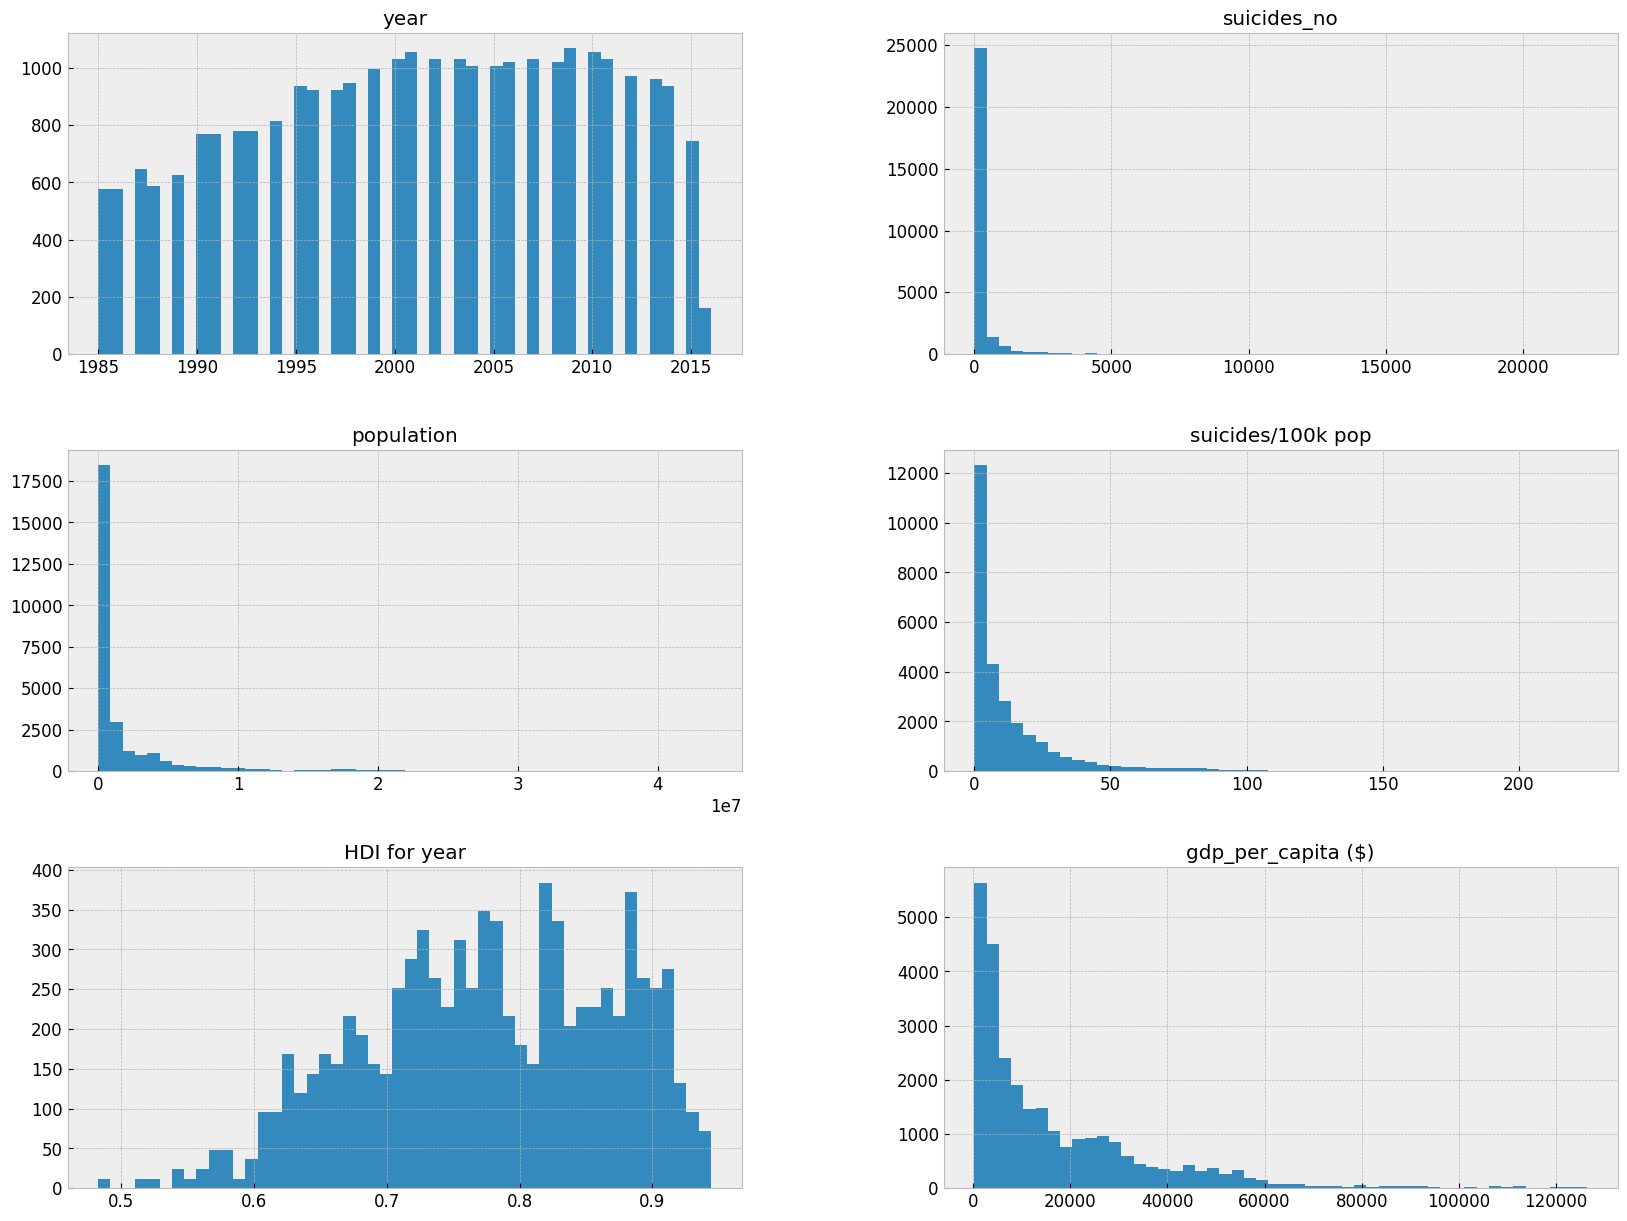

In [9]:
suicide_df.hist (bins=50, figsize= (20, 15) )
plt.show

In [10]:
cdc_url= "https://www.cdc.gov/mmwr/volumes/69/su/su6901a6.htm"
page= requests.get(cdc_url)
soup= BeautifulSoup (page.content, 'html.parser')
tables = soup.find_all('table')

cdc_data_df = pd.read_html (str(tables))

cdc_data_df

C:\Users\zsams\AppData\Local\Temp\ipykernel_5912\3141362488.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  cdc_data_df = pd.read_html (str(tables))


[                                             Behavior  \
 0             Seriously considered attempting suicide   
 1                                                 Yes   
 2                                                  No   
 3                                 Made a suicide plan   
 4                                                 Yes   
 5                                                  No   
 6                                   Attempted suicide   
 7                                                 Yes   
 8                                                  No   
 9   Made a suicide attempt requiring medical treat...   
 10                                                Yes   
 11                                                 No   
 
                                     Female % (95% CI)  \
 0             Seriously considered attempting suicide   
 1                                    24.1 (22.3‒26.0)   
 2                                    75.9 (74.0‒77.7)   
 3          

## Exploratory data analysis

At this stage, the data I have can show me the recorded suicide number by country. The data can be further explored by creating demographic statistics and try to explore if the suicide rate is prevalent to a certain demographic. 

Most of the HDI data appears to be missing and and since it is least significant to my topic, I will cleanup the data by removing the column from the dataframe.

I am unable to string the suicide dataset to the other datasets as the dataset does not specify the reason for the suicide and all that can be made at this point are assumptions

In [21]:
suicide_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


<function matplotlib.pyplot.show(close=None, block=None)>

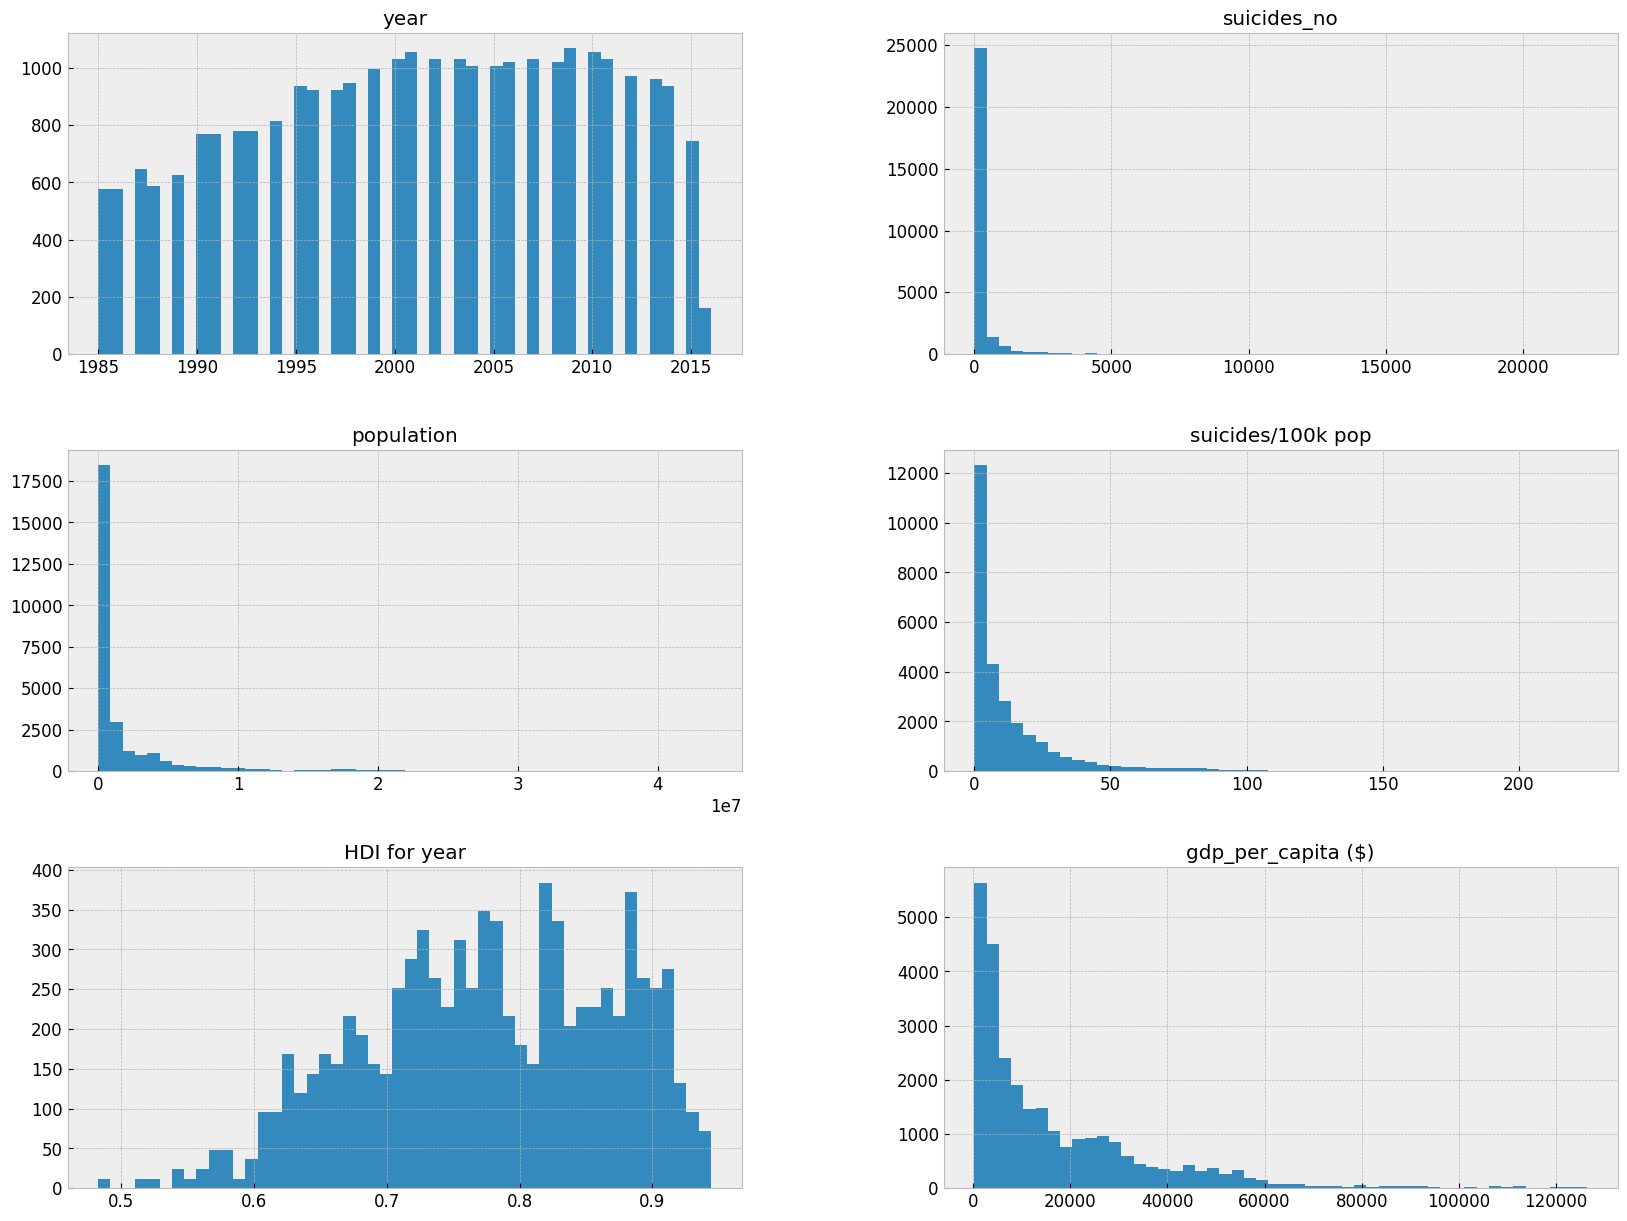

In [25]:
#Viewing a histogram to better understand the data
suicide_df.hist (bins=50, figsize= (20, 15) )
plt.show

In [40]:
suicide_df.corr()

ValueError: could not convert string to float: 'Albania'

<function matplotlib.pyplot.show(close=None, block=None)>

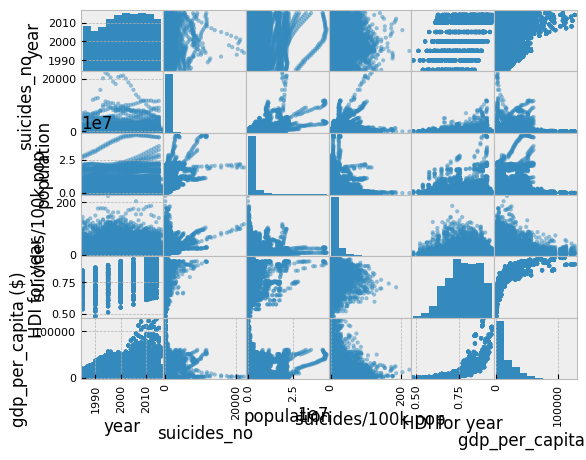

In [24]:
#Plotting the scatter plot to see how the different variables withing the data relate to each other
scatter_matrix (suicide_df)
plt.show

In [37]:
#exploring if there exists a correlation between the different columns
suicide_df.year.corr (suicide_df.suicides_no)

-0.004545957507435394

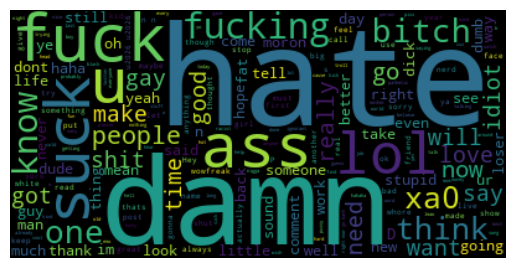

In [52]:
#Generating a wordcloud from the Cyberbullying tweets.
# Concatenate the text from all rows into a single string
text = ' '.join(tweets_df['Text'])

# Generate the word cloud
wordcloud = WordCloud().generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data Cleaning

In [27]:
suicide_without_na = suicide_df.dropna () #removing empty data from the data frame


In [29]:
suicide_without_na.isnull().sum() #Print the new data frame with dropped null values

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

## Machine Learning Plan

What type of machine learning model are you planning to use?

I intend on using the regression model in trying to find the best fit line and for the predictive analysis of the discrete data values. For the Cyberbullying tweets, I intend on using the K-Nearest neighbbor algorithm to try and train the model to recognize patterns in words from the word cloud.

What are the challenges have you identified/are you anticipating in building your machine learning model?

The challenges are mostly lack of labeled datasets for most of the sources I find, especially for the cyberbullying datasets. The other challenge is hardship in finding the relation between the datasets due to the missing labels and a clustering attribute.


How are you planning to address these challenges?

To deal with these challenges, I consider using active-learning, which may include selecting the most useful information from the unlabelled datasets and labelling them for an easy reference and training of the model. I also consider restructuring the datasets to only extract the columns that may be the most useful for this project.

## Machine Learning Implementation Process

- Extract the age column from the suicide data
-Extract the number of suicide reports from the data
-Remove all the empty values from the data
-Find the Mean
-Impute the empty values with the mean
-Plot a graph of the age against the number of suicide reported and label the age groups\
-Compute the RMSE for the number of suicide reported
-Separate the data into Train and Test data and display the best fit line.
-Use the pipeline to predict the future trends using the best fit line.

## Peer feedback

Psolademi commented that they like the concept of my project and what you are doing with this, the datasets are also coning along rightly so far. Based on these comments I will keep on working on my project and take into consideration any further feedback.

## Resources and References
*What resources and references have you used for this project?*
📝 <!-- Answer Below -->


-https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016/

-https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch

-https://medium.com/linkit-intecs/how-to-upload-large-files-to-github-repository-2b1e03723d2

-https://www.pewresearch.org/search/cyberbullying

# ⚠️ Make sure you run this cell at the end of your notebook before every submission!
!jupyter nbconvert --to python source.ipynb

In [30]:
!jupyter nbconvert --to python source.ipynb

[NbConvertApp] Converting notebook source.ipynb to python
[NbConvertApp] Writing 8221 bytes to source.py
